# Model

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_no = pd.read_csv('2000-2021_nofires+weather.csv') # No wildfire
df_no['hectares'] = 0
df_yes = pd.read_csv('2000-2021_fires+weather.csv') # Wildfire dataset
df = pd.concat([df_yes, df_no])

In [4]:
df['class'] = (df.loc[:, 'hectares'] > 0).astype(int)

## Feature Engineering
We create a new column month, since from EDA month has a great impact on likelihood of wildfires

In [5]:
# We make a month column
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

In [6]:
df.head()

,lat,lon,date,hectares,elevation,temp_c,max_temp_c,min_temp_c,wind_kph,wind_dir,precip_mm,humidity,pressure_hPa,soil_temp_c,soil_moisture,totalsnow_cm,class,month
0,56.7136,-110.4490,2000-01-01,0.20,347.0,-29.992,-25.265,-33.665,9.470,242.195,0.0,72.753,971.810,-1.340,0.585,0.0,1,1
1,54.7522,-114.9147,2000-01-03,0.30,827.0,-18.440,-13.971,-22.872,9.720,179.298,0.0,58.110,921.216,-8.824,0.558,0.0,1,1
2,53.6615,-102.1771,2000-01-06,0.30,264.0,-21.514,-18.139,-22.889,10.163,265.019,0.0,77.443,985.953,-1.606,0.587,0.0,1,1
3,51.0722,-115.3002,2000-01-07,0.50,1333.0,-8.396,-3.916,-10.766,17.917,249.972,0.0,81.143,853.531,0.592,0.212,0.0,1,1
4,51.0668,-115.1288,2000-01-07,0.25,1283.0,-6.168,-1.646,-8.895,17.917,249.972,0.0,72.987,860.034,-3.393,0.290,0.0,1,1


In [7]:
df.describe()

,lat,lon,date,hectares,elevation,temp_c,max_temp_c,min_temp_c,wind_kph,wind_dir,precip_mm,humidity,pressure_hPa,soil_temp_c,soil_moisture,totalsnow_cm,class,month
count,173558.000000,173558.000000,173558,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000,173558.000000
mean,52.763733,-112.071516,2010-10-16 07:05:38.971410176,129.177976,754.117874,10.660298,16.681407,5.341760,13.848064,199.069128,1.282118,63.524727,928.229820,10.039554,0.334743,0.159646,0.496808,5.747560
min,42.915700,-136.375000,1999-11-12 00:00:00,0.000000,-2.000000,-35.852000,-32.010000,-40.742000,1.800000,0.000000,0.000000,16.860000,717.632000,-19.478000,0.000000,0.000000,0.000000,1.000000
25%,50.153350,-120.154550,2005-06-21 00:00:00,0.000000,404.000000,5.077000,10.735000,0.149000,9.660000,134.372250,0.000000,53.613000,893.092250,2.561250,0.244250,0.000000,0.000000,5.000000
50%,52.605000,-116.308767,2010-06-05 00:00:00,0.000000,664.000000,12.233000,18.374000,6.704000,12.965000,213.690000,0.000000,63.341000,935.463500,11.236000,0.327000,0.000000,0.000000,6.000000
75%,55.446500,-110.771865,2015-09-19 00:00:00,0.100000,1067.000000,17.572000,23.857750,11.779000,17.057000,266.595500,1.000000,73.428000,965.850750,16.607000,0.396000,0.000000,1.000000,7.000000
max,60.182700,-59.829412,2021-12-14 00:00:00,577646.800000,2799.000000,36.833000,46.762000,27.171000,61.924000,360.000000,78.300000,99.987000,1040.466000,38.190000,0.764000,30.100000,1.000000,12.000000
std,3.491016,14.525921,NaN,3650.526019,460.432677,9.055219,9.518812,8.553774,5.825417,90.185755,3.205991,13.538265,50.371736,7.792177,0.126900,0.884895,0.499991,1.821684


## Train, test, validation
Splitting dataset into train, test, validation, selecting input features and target columns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
# Train, test, validation split
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=11)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=11)

In [10]:
# Input and target columns
input_col = ['lat', 'lon', 'elevation', 'temp_c', 'max_temp_c', 'min_temp_c', 'wind_kph', 'precip_mm', 'humidity', 'pressure_hPa', 'soil_temp_c', 'soil_moisture', 'totalsnow_cm', 'month']
target_col = 'class'

In [11]:
# Create inputs and targets for train, test, validation sets
x_train = train_df[input_col].copy()
y_train = train_df[target_col].copy()
x_val = val_df[input_col].copy()
y_val = val_df[target_col].copy()
x_test = test_df[input_col].copy()
y_test = test_df[target_col].copy()

In [12]:
df.isna().sum()

lat              0
lon              0
date             0
hectares         0
elevation        0
temp_c           0
max_temp_c       0
min_temp_c       0
wind_kph         0
wind_dir         0
precip_mm        0
humidity         0
pressure_hPa     0
soil_temp_c      0
soil_moisture    0
totalsnow_cm     0
class            0
month            0
dtype: int64

## Scaling features

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler().fit(df[input_col])

In [15]:
x_train[input_col] = scaler.transform(x_train[input_col])
x_val[input_col] = scaler.transform(x_val[input_col])
x_test[input_col] = scaler.transform(x_test[input_col])

In [16]:
x_val.describe().loc[['min', 'max']]

,lat,lon,elevation,temp_c,max_temp_c,min_temp_c,wind_kph,precip_mm,humidity,pressure_hPa,soil_temp_c,soil_moisture,totalsnow_cm,month
min,0.000000,0.0,0.000357,0.014804,0.012923,0.036076,0.000599,0.000000,0.000000,0.000000,0.000329,0.000000,0.000000,0.0
max,0.990255,1.0,1.000000,0.951077,0.977352,0.975321,0.896597,0.904215,0.998977,0.994056,0.878685,0.997382,0.895349,1.0


## Model Selection
It is not evident which model would best be used for our dataset, so we perform simple tests to see if basic models might be viable using a single test-train split

### Logistic Regression model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
# Predicting on the train set
y_pred_train = model.predict(x_train)

# Evaluating the model on the train set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f"Train set Accuracy: {accuracy_train}")
print(f"Train set Precision: {precision_train}")
print(f"Train set Recall: {recall_train}")
print(f"Train set f1: {f1_train}")

print("==============================================================")
# Predicting on the test set
y_pred_test = model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
print(f"Test set Accuracy: {accuracy_test}")
print(f"Test set Precision: {precision_test}")
print(f"Test set Recall: {recall_test}")
print(f"Test set f1: {f1_test}")

Train set Accuracy: 0.7117175946376784
Train set Precision: 0.6976870551158284
Train set Recall: 0.7429265752473528
Train set f1: 0.7195964879506819
Test set Accuracy: 0.7103307213643697
Test set Precision: 0.6931366679366462
Test set Recall: 0.7424790111940298
Test set f1: 0.7169598874032371


### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier(random_state=11)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

In [22]:
# Predicting on the train set
y_pred_train = model.predict(x_train)

# Evaluating the model on the train set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f"Train set Accuracy: {accuracy_train}")
print(f"Train set Precision: {precision_train}")
print(f"Train set Recall: {recall_train}")
print(f"Train set f1: {f1_train}")

print("==============================================================")
# Predicting on the test set
y_pred_test = model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
print(f"Test set Accuracy: {accuracy_test}")
print(f"Test set Precision: {precision_test}")
print(f"Test set Recall: {recall_test}")
print(f"Test set f1: {f1_test}")

Train set Accuracy: 0.999951984942478
Train set Precision: 1.0
Train set Recall: 0.9999035661247083
Train set f1: 0.999951780737369
Test set Accuracy: 0.7248213874164554
Test set Precision: 0.7223262344956705
Test set Recall: 0.7197994402985075
Test set f1: 0.7210606237589067


Decision Tree Regressor has overfit

### Random Forests 

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = RandomForestClassifier(random_state=11)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=11)

In [19]:
# Predicting on the train set
y_pred_train = model.predict(x_train)

# Evaluating the model on the train set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f"Train set Accuracy: {accuracy_train}")
print(f"Train set Precision: {precision_train}")
print(f"Train set Recall: {recall_train}")
print(f"Train set f1: {f1_train}")

print("==============================================================")
# Predicting on the test set
y_pred_test = model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
print(f"Test set Accuracy: {accuracy_test}")
print(f"Test set Precision: {precision_test}")
print(f"Test set Recall: {recall_test}")
print(f"Test set f1: {f1_test}")

Train set Accuracy: 0.9999327789194692
Train set Precision: 0.9999228543876567
Train set Recall: 0.9999421396748249
Train set f1: 0.999932496938254
Test set Accuracy: 0.8257374971191519
Test set Precision: 0.8132016925246827
Test set Recall: 0.8403684701492538
Test set f1: 0.8265619175961235


### Gradient Boosting Model

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [28]:
# Predicting on the train set
y_pred_train = model.predict(x_train)

# Evaluating the model on the train set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f"Train set Accuracy: {accuracy_train}")
print(f"Train set Precision: {precision_train}")
print(f"Train set Recall: {recall_train}")
print(f"Train set f1: {f1_train}")

print("==============================================================")
# Predicting on the test set
y_pred_test = model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
print(f"Test set Accuracy: {accuracy_test}")
print(f"Test set Precision: {precision_test}")
print(f"Test set Recall: {recall_test}")
print(f"Test set f1: {f1_test}")

Train set Accuracy: 0.7578792709393666
Train set Precision: 0.7416972160720119
Train set Recall: 0.7882312098593994
Train set f1: 0.7642565286907088
Test set Accuracy: 0.750893062917723
Test set Precision: 0.7326185657239758
Test set Recall: 0.7808418843283582
Test set f1: 0.7559619563683572


### XGB Classifier

In [20]:
from xgboost import XGBClassifier

In [21]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
# Predicting on the train set
y_pred_train = model.predict(x_train)

# Evaluating the model on the train set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f"Train set Accuracy: {accuracy_train}")
print(f"Train set Precision: {precision_train}")
print(f"Train set Recall: {recall_train}")
print(f"Train set f1: {f1_train}")

print("==============================================================")
# Predicting on the test set
y_pred_test = model.predict(x_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
print(f"Test set Accuracy: {accuracy_test}")
print(f"Test set Precision: {precision_test}")
print(f"Test set Recall: {recall_test}")
print(f"Test set f1: {f1_test}")

Train set Accuracy: 0.8457468262046978
Train set Precision: 0.8296790360025058
Train set Recall: 0.8684834808771625
Train set f1: 0.8486379013032048
Test set Accuracy: 0.8105554275178612
Test set Precision: 0.7942354774093033
Test set Recall: 0.832206156716418
Test set f1: 0.8127775879740349


### K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
# Predicting on the train set
y_pred_train = model.predict(x_train)

# Evaluating the model on the train set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f"Train set Accuracy: {accuracy_train}")
print(f"Train set Precision: {precision_train}")
print(f"Train set Recall: {recall_train}")
print(f"Train set f1: {f1_train}")

print("==============================================================")
# Predicting on the test set
y_pred_test = model.predict(x_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
print(f"Test set Accuracy: {accuracy_test}")
print(f"Test set Precision: {precision_test}")
print(f"Test set Recall: {recall_test}")
print(f"Test set f1: {f1_test}")

Train set Accuracy: 0.8422129179710758
Train set Precision: 0.835512106399909
Train set Recall: 0.850546780072904
Train set f1: 0.842962410757806
Test set Accuracy: 0.7712894676192671
Test set Precision: 0.7625833665849626
Test set Recall: 0.7799673507462687
Test set f1: 0.7711774030840178


### Support Vector Machines

In [35]:
from sklearn.svm import SVC

In [36]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [37]:
# Predicting on the train set
y_pred_train = model.predict(x_train)

# Evaluating the model on the train set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train   )

print(f"Train set Accuracy: {accuracy_train}")
print(f"Train set Precision: {precision_train}")
print(f"Train set Recall: {recall_train}")
print(f"Train set f1: {f1_train}")

print("==============================================================")
# Predicting on the test set
y_pred_test = model.predict(x_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
print(f"Test set Accuracy: {accuracy_test}")
print(f"Test set Precision: {precision_test}")
print(f"Test set Recall: {recall_test}")
print(f"Test set f1: {f1_test}")

Train set Accuracy: 0.7495150479190275
Train set Precision: 0.7321798684329098
Train set Recall: 0.7835252367451638
Train set f1: 0.7569828758827585
Test set Accuracy: 0.7453042175616501
Test set Precision: 0.7255359565807327
Test set Recall: 0.7793843283582089
Test set f1: 0.7514967535205329


It seems from this basic test that the random forests classifier performs the best on the dataset, so we will move forward with this model. However, it also seems like the XGB Classifier also works very well. So we will evaluate both models and tune both models to see which one would perform best after being fine-tuned.

## Hyperparameter Tuning for random forests
[Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### Max Depth

In [20]:
# Experiment with max depth
def max_depth_error(md):
    model = RandomForestClassifier(max_depth=md, random_state=11, n_jobs=-1)
    model.fit(x_train, y_train)
    train_acc = 1 - model.score(x_train, y_train)
    test_acc = 1 - model.score(x_test, y_test)
    return {'Max Depth': md, 'Training Error': train_acc, 'Test Error': test_acc}

In [24]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 61)])

In [25]:
errors_df

,Max Depth,Training Error,Test Error
0,1,0.291634,0.293126
1,2,0.273657,0.275150
2,3,0.268644,0.270656
3,4,0.259569,0.260832
4,5,0.240037,0.243288
5,6,0.226842,0.232513
6,7,0.218132,0.224677
7,8,0.208433,0.218051
8,9,0.198907,0.211944
9,10,0.188642,0.207392


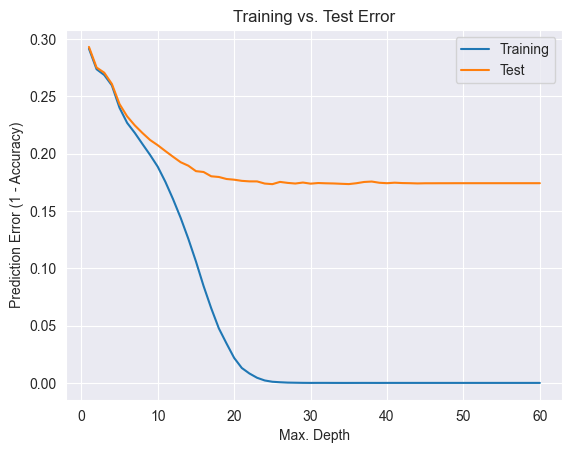

In [26]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Test Error'])
plt.title('Training vs. Test Error')
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test'])

No max depth seems to have an impact. Best option is to keep at None

### Number of estimators

In [30]:
# Experiment with max depth
def max_estimator_err(n):
    model = RandomForestClassifier(n_estimators=n, random_state=11, n_jobs=-1)
    model.fit(x_train, y_train)
    train_acc = 1 - model.score(x_train, y_train)
    test_acc = 1 - model.score(x_test, y_test)
    return {'Estimators': n, 'Training Error': train_acc, 'Test Error': test_acc}

In [31]:
errors_df = pd.DataFrame([max_estimator_err(md) for md in range(1, 1202, 50)])

In [32]:
errors_df

,Estimators,Training Error,Test Error
0,1,0.098642,0.270051
1,51,0.000230,0.176884
2,101,0.000058,0.174291
3,151,0.000048,0.173456
4,201,0.000048,0.172505
5,251,0.000048,0.172851
6,301,0.000048,0.172937
7,351,0.000048,0.172937
8,401,0.000048,0.172505
9,451,0.000048,0.172246


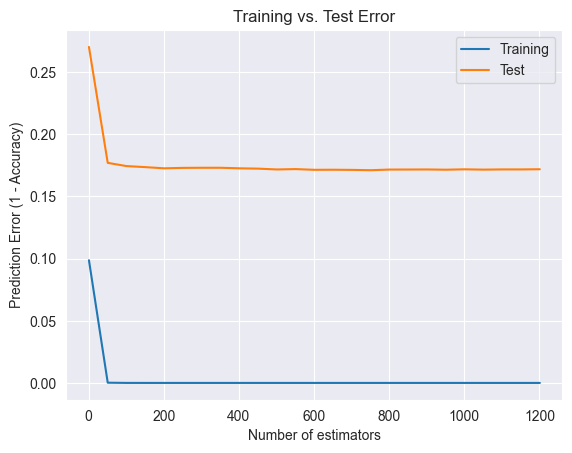

In [33]:
plt.figure()
plt.plot(errors_df['Estimators'], errors_df['Training Error'])
plt.plot(errors_df['Estimators'], errors_df['Test Error'])
plt.title('Training vs. Test Error')
plt.xlabel('Number of estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test'])

More estimators = less testing error -> It seems like at 600 estimators it has the least amount of error. However, we keep at 200 because it is more worth and less computationally expensive

### Max Leaf Nodes

In [41]:
# Experiment with max depth
def max_leaf_error(ml):
    model = RandomForestClassifier(max_leaf_nodes=ml, random_state=11, n_estimators=600, n_jobs=-1)
    model.fit(x_train, y_train)
    train_acc = 1 - model.score(x_train, y_train)
    test_acc = 1 - model.score(x_test, y_test)
    return {'Max Leaf Nodes': ml, 'Training Error': train_acc, 'Test Error': test_acc}

In [42]:
errors_df = pd.DataFrame([max_leaf_error(md) for md in range(2, 5003, 500)])

In [43]:
errors_df

,Max Leaf Nodes,Training Error,Test Error
0,2,0.293814,0.295172
1,502,0.173229,0.196186
2,1002,0.151372,0.189877
3,1502,0.134231,0.186708
4,2002,0.120950,0.184173
5,2502,0.108783,0.182098
6,3002,0.097941,0.180658
7,3502,0.088280,0.179967
8,4002,0.079158,0.179506
9,4502,0.071081,0.178555


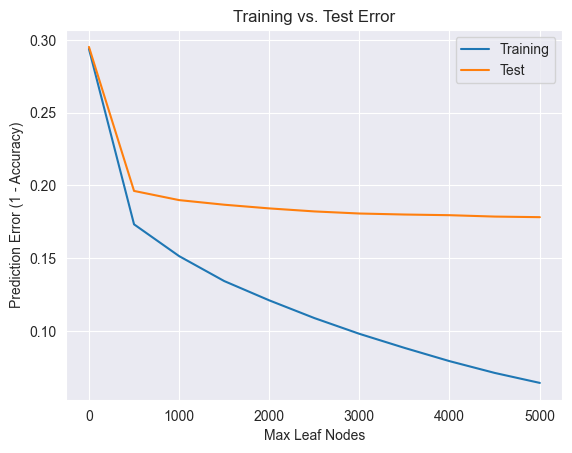

In [44]:
plt.figure()
plt.plot(errors_df['Max Leaf Nodes'], errors_df['Training Error'])
plt.plot(errors_df['Max Leaf Nodes'], errors_df['Test Error'])
plt.title('Training vs. Test Error')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test'])

Conclusion: Lowest error when we do not restrict max leaf nodes

### Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [20]:
model = RandomForestClassifier(random_state=11, n_jobs=-1)

In [21]:
# Defining hyperparameters to tune
forest_param_grid = {
    'n_estimators': [200, 600],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'min_impurity_decrease': [0, 1e-07],
    'max_features': ['sqrt', None],
    'criterion': ['gini', 'entropy']
}

# Performing Grid Search with cross-validation
GS = GridSearchCV(estimator=model, param_grid=forest_param_grid, cv=5, verbose=2)
GS.fit(x_train, y_train)

# Best hyperparameters found
forest_best_params = GS.best_params_
print("Best hyperparameters:", forest_best_params, '\n')

# Evaluate the model with best hyperparameters on test set
forest_best_model = GS.best_estimator_
forest_accuracy = forest_best_model.score(x_test, y_test)
print(f"Accuracy on test set with best hyperparameters: {forest_accuracy}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END criterion=gini, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END criterion=gini, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END criterion=gini, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END criterion=gini, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END criterion=gini, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END criterion=gini, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  10.4s
[CV] END criterion=gini, max_features=sqrt, min_impurit

C:\Users\ethan\PycharmProjects\fire-guard\model\venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600} 

Accuracy on test set with best hyperparameters: 0.8279557501728508


## Random Forests model with best hyperparameters

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = RandomForestClassifier(random_state=11, 
                               n_estimators=600, 
                               criterion='entropy', 
                               min_samples_leaf=1, 
                               min_samples_split=2, 
                               max_features='sqrt', 
                               n_jobs=-1
                               )
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=600, n_jobs=-1,
                       random_state=11)

In [19]:
model.score(x_test, y_test)

0.8279557501728508

In [20]:
model.score(x_val, y_val)

0.8243546900207421

Even with the best hyperparameters, we see only a marginal 1% increase in the accuracy. This might have reached the limits of the modeling technique (random forests) or reached the limits of what is possible to predict given this amount of data, and the only way to further improve the model would be by getting more data.

## Validation for random forests

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    
    return preds

Accuracy: 100.00%


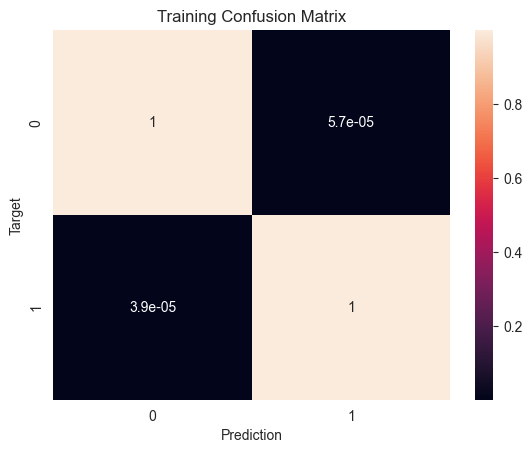

In [33]:
train_preds = predict_and_plot(x_train, y_train, 'Training')

Accuracy: 82.80%


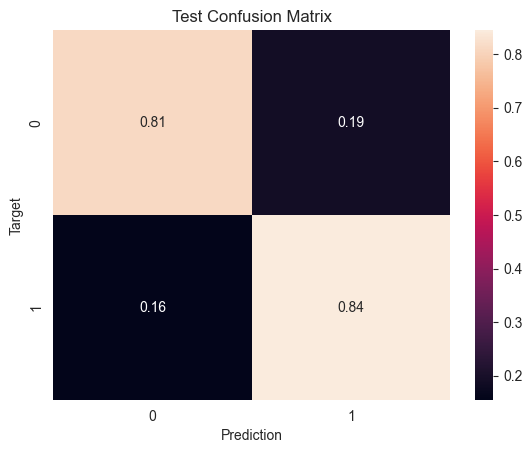

In [34]:
test_pred = predict_and_plot(x_test, y_test, 'Test')

Accuracy: 82.44%


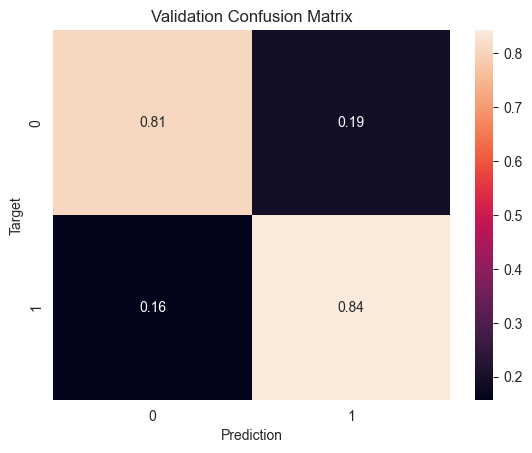

In [35]:
val_pred = predict_and_plot(x_val, y_val, 'Validation')

## Random Forests Feature Importance

In [36]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

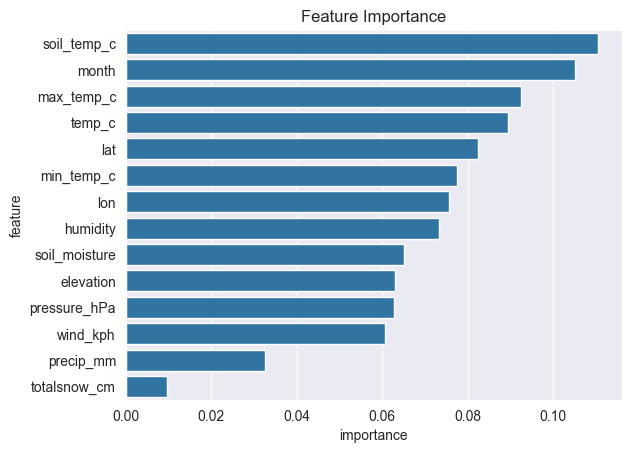

In [37]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

## Hyperparameter tuning with XGB Classifier

In [52]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
model.score(x_test, y_test)

0.8105554275178612

### Number of estimators

In [60]:
# Experiment with max depth
def max_estimator_err(n):
    model = XGBClassifier(n_estimators=n, random_state=11, n_jobs=-1)
    model.fit(x_train, y_train)
    train_acc = 1 - model.score(x_train, y_train)
    test_acc = 1 - model.score(x_test, y_test)
    return {'Estimators': n, 'Training Error': train_acc, 'Test Error': test_acc}

In [66]:
errors_df = pd.DataFrame([max_estimator_err(md) for md in range(1, 2002, 100)])

In [67]:
errors_df

,Estimators,Training Error,Test Error
0,1,0.248132,0.253342
1,101,0.154071,0.188955
2,201,0.127470,0.186823
3,301,0.105335,0.186103
4,401,0.087071,0.185584
5,501,0.069094,0.184576
6,601,0.055035,0.186074
7,701,0.044616,0.185325
8,801,0.035608,0.184605
9,901,0.026946,0.184547


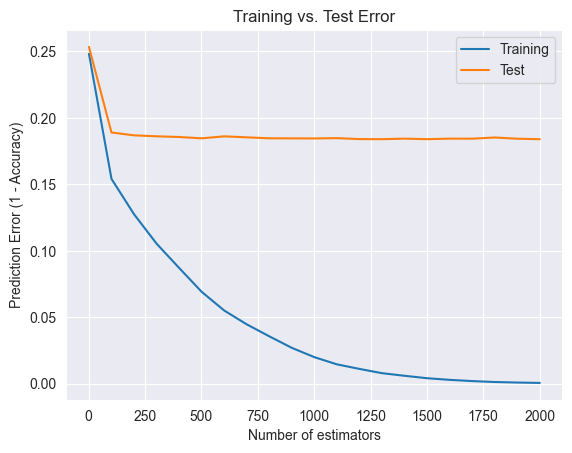

In [68]:
plt.figure()
plt.plot(errors_df['Estimators'], errors_df['Training Error'])
plt.plot(errors_df['Estimators'], errors_df['Test Error'])
plt.title('Training vs. Test Error')
plt.xlabel('Number of estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test'])

Best is 500 estimators, after that it gets minimally better and overfits 

### Max Depth 

In [72]:
# Experiment with max depth
def max_depth_error(md):
    model = XGBClassifier(max_depth=md, random_state=11, n_estimators=500, n_jobs=-1)
    model.fit(x_train, y_train)
    train_acc = 1 - model.score(x_train, y_train)
    test_acc = 1 - model.score(x_test, y_test)
    return {'Max Depth': md, 'Training Error': train_acc, 'Test Error': test_acc}

In [73]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(3, 31)])

In [74]:
errors_df

,Max Depth,Training Error,Test Error
0,3,0.175418,0.192614
1,4,0.149317,0.189790
2,5,0.116158,0.186650
3,6,0.069132,0.184518
4,7,0.030691,0.185527
5,8,0.006751,0.183568
6,9,0.000519,0.180082
7,10,0.000154,0.177028
8,11,0.000144,0.177431
9,12,0.000144,0.175847


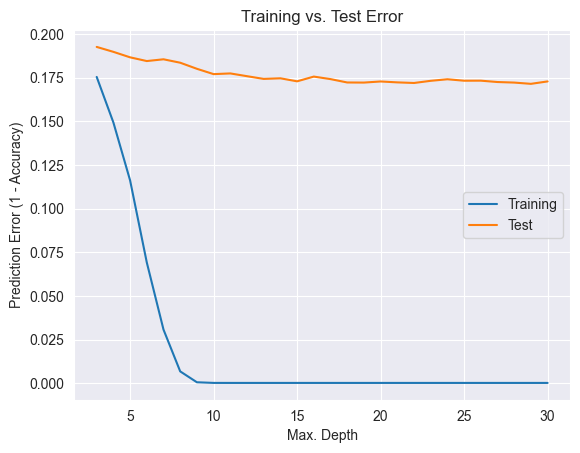

In [75]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Test Error'])
plt.title('Training vs. Test Error')
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test'])

Max depth of 28 seems to have the best effect and lowest error

### Max Leaf Nodes

In [80]:
# Experiment with max depth
def max_leaf_error(ml):
    model = XGBClassifier(max_leaf_nodes=ml, random_state=11, n_estimators=500, max_depth=28, n_jobs=-1)
    model.fit(x_train, y_train)
    train_acc = 1 - model.score(x_train, y_train)
    test_acc = 1 - model.score(x_test, y_test)
    return {'Max Leaf Nodes': ml, 'Training Error': train_acc, 'Test Error': test_acc}

In [81]:
errors_df = pd.DataFrame([max_leaf_error(md) for md in range(2, 5003, 500)])

C:\Users\ethan\PycharmProjects\fire-guard\model\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:38:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ethan\PycharmProjects\fire-guard\model\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:39:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ethan\PycharmProjects\fire-guard\model\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:39:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_leaf_nodes" } are not used.

  w

In [82]:
errors_df

,Max Leaf Nodes,Training Error,Test Error
0,2,0.000144,0.172188
1,502,0.000144,0.172188
2,1002,0.000144,0.172188
3,1502,0.000144,0.172188
4,2002,0.000144,0.172188
5,2502,0.000144,0.172188
6,3002,0.000144,0.172188
7,3502,0.000144,0.172188
8,4002,0.000144,0.172188
9,4502,0.000144,0.172188


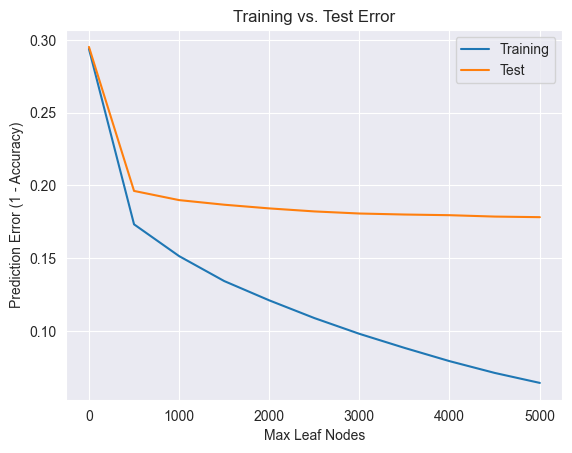

In [79]:
plt.figure()
plt.plot(errors_df['Max Leaf Nodes'], errors_df['Training Error'])
plt.plot(errors_df['Max Leaf Nodes'], errors_df['Test Error'])
plt.title('Training vs. Test Error')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test'])

Keep at 3000

## XGB Model with best hyperparameters

In [83]:
model = XGBClassifier(random_state=11, n_estimators=500, max_depth=28, max_leaf_nodes=3000, n_jobs=-1)

In [84]:
model.fit(x_train, y_train)

C:\Users\ethan\PycharmProjects\fire-guard\model\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:49:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=28, max_leaf_nodes=3000,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, ...)

In [85]:
model.score(x_test, y_test)

0.8278117077667665

In [86]:
model.score(x_val, y_val)

0.8220212030421756

## Saving Random Forests model to drive

In [21]:
import joblib

In [22]:
model_disk = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_col,
    'target_col': target_col,
}

In [23]:
joblib.dump(model_disk, 'model.joblib')

['model.joblib']

## Making predictions on new inputs with model from drive

In [24]:
# Load model from disk
model_from_disk = joblib.load('model.joblib') # Same format as model_disk

In [26]:
model_from_disk['model'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 600,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 11,
 'verbose': 0,
 'warm_start': False}

In [88]:
# Hypothetical input
new_input = {
    'lat': 55.063,
    'lon': -117.8106,
    'date': '2000-01-10',
    'hectares': 0.01,
    'elevation': 675.0,
    'temp_c': -14.839,
    'max_temp_c': -7.57,
    'min_temp_c': -20.52,
    'wind_kph': 9.747,
    'wind_dir': 36.19,
    'precip_mm': 0.0,
    'humidity': 80.681,
    'pressure_hPa': 922.412,
    'soil_temp_c': -1.701,
    'soil_moisture': 0.348,
    'totalsnow_cm': 1.61
}

In [72]:
# Make into dataframe
new_input_df = pd.DataFrame([new_input])

In [73]:
new_input_df

,lat,lon,date,hectares,elevation,temp_c,max_temp_c,min_temp_c,wind_kph,wind_dir,precip_mm,humidity,pressure_hPa,soil_temp_c,soil_moisture,totalsnow_cm
0,55.063,-117.8106,2000-01-10,0.01,675.0,-14.839,-7.57,-20.52,9.747,36.19,0.0,80.681,922.412,-1.701,0.348,1.61


In [74]:
# Get columns
input_columns = model_from_disk['input_cols']
target_column = model_from_disk['target_col']

In [75]:
# Make month column
new_input_df['date'] = pd.to_datetime(new_input_df['date'])
new_input_df['month'] = new_input_df['date'].dt.month

In [76]:
new_input_df

,lat,lon,date,hectares,elevation,temp_c,max_temp_c,min_temp_c,wind_kph,wind_dir,precip_mm,humidity,pressure_hPa,soil_temp_c,soil_moisture,totalsnow_cm,month
0,55.063,-117.8106,2000-01-10,0.01,675.0,-14.839,-7.57,-20.52,9.747,36.19,0.0,80.681,922.412,-1.701,0.348,1.61,1


In [77]:
# Run scaler on input columns
new_input_df[input_columns] = model_from_disk['scaler'].transform(new_input_df[input_columns])

In [78]:
new_input_df

,lat,lon,date,hectares,elevation,temp_c,max_temp_c,min_temp_c,wind_kph,wind_dir,precip_mm,humidity,pressure_hPa,soil_temp_c,soil_moisture,totalsnow_cm,month
0,0.703498,0.242527,2000-01-10,0.01,0.241699,0.289097,0.310263,0.297763,0.132177,36.19,0.0,0.767753,0.63432,0.308265,0.455497,0.053488,0.0


In [79]:
xs = new_input_df[input_columns]

In [80]:
pred = model_from_disk['model'].predict(xs)[0]

In [81]:
pred

np.int64(1)

In [82]:
prob = model_from_disk['model'].predict_proba(xs)[0][list(model_from_disk['model'].classes_).index(pred)]

In [83]:
prob

np.float64(0.66)

## Summary for loading model and predicting

In [25]:
# Load model from disk
model_from_disk = joblib.load('model.joblib') # Same format as model_disk

In [26]:
# Hypothetical input
new_input = {
    'lat': 55.063,
    'lon': -117.8106,
    'date': '2000-01-10',
    'hectares': 0.01,
    'elevation': 675.0,
    'temp_c': -14.839,
    'max_temp_c': -7.57,
    'min_temp_c': -20.52,
    'wind_kph': 9.747,
    'wind_dir': 36.19,
    'precip_mm': 0.0,
    'humidity': 80.681,
    'pressure_hPa': 922.412,
    'soil_temp_c': -1.701,
    'soil_moisture': 0.348,
    'totalsnow_cm': 1.61
}

In [27]:
def predict_input(input):
    # Make into dataframe
    input_df = pd.DataFrame([input])
    # Get columns
    input_columns = model_from_disk['input_cols']
    # Make month column
    input_df['date'] = pd.to_datetime(input_df['date'])
    input_df['month'] = input_df['date'].dt.month
    # Run scaler on input columns
    input_df[input_columns] = model_from_disk['scaler'].transform(input_df[input_columns])
    x_input = input_df[input_columns]
    prediction = model_from_disk['model'].predict(x_input)[0]
    probability = model_from_disk['model'].predict_proba(x_input)[0][list(model_from_disk['model'].classes_).index(prediction)]
    return prediction, probability

In [28]:
predict_input(new_input)

(np.int64(1), np.float64(0.66))